In [93]:
import pandas as pd
import numpy as np


In [94]:
df = pd.read_csv('/Users/noahpovis/Desktop/Buildweek22/Build Week 2 /DX.csv')



In [95]:
def clean(i):
    i = i.copy()
    i.drop_duplicates(subset=['Organization Name','Funding Type'], inplace = True)
    i.drop_duplicates(keep='first', inplace= True)
    i['Raised Series A'] = np.where(i['Organization Name'].duplicated(), 1, 0)
    i.drop_duplicates(subset='Organization Name', keep='last', inplace= True)
    i['Money Raised Currency (in USD)'] = pd.to_numeric(i['Money Raised Currency (in USD)'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i['Announced Date'] = pd.to_datetime(i['Announced Date'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i  = i[i['Funding Type'] != 'Series A'] 
    return i 

In [96]:
df_clean = clean(df)

In [97]:
def split_columns(text):
    text = text.copy()
    # new data frame with split value columns 
    new = text["Organization Industries"].str.split(",", n = 7, expand = True) 
    # making separate first name column from new data frame 
    text["Primary Industry"]= new[0] 
    # making separate last name column from new data frame 
    text["Sub_Ind"]= new[1] 
    text["Sub_Ind2"]= new[2]
    text["Sub_Ind3"]= new[3]
    text["Sub_Ind4"]= new[4]
    text["Sub_Ind5"]= new[5]
    text["Sub_Ind6"]= new[6]
    text["Sub_Ind7"]= new[7]
    # Dropping old Name columns 
    text.drop(columns =["Organization Industries"], inplace = True)

    #same thing but for investor column 
    new1 = text["Investor Names"].str.split(",", n = 11, expand = True) 
    # making separate first name column from new data frame 
    text["Investor1"]= new1[0] 
    # making separate last name column from new data frame 
    text["Investor1"]= new1[1] 
    text["Investor2"]= new1[2]
    text["Investor3"]= new1[3]
    text["Investor4"]= new1[4]
    text["Investor5"]= new1[5]
    text["Investor6"]= new1[6]
    text["Investor7"]= new1[7]
    text["Investor8"]= new1[8]
    text["Investor9"]= new1[9]
    text["Investor10"]= new1[10]
    text["Investor11"]= new1[11]
    # Dropping old Name columns 
    text.drop(columns =["Investor Names"], inplace = True)
    text.drop(columns =["Lead Investors"], inplace = True)
    text.drop(columns =["Number of Investors"], inplace = True)
    text.drop(columns =["Transaction Name"], inplace = True)
    text.drop(columns =["Transaction Name URL"], inplace = True)
    text.drop(columns =["Organization Name URL"], inplace = True)
    text.drop(columns =["Funding Type"], inplace = True)
    text.drop(columns =["Money Raised Currency"], inplace = True)
    text.drop(columns =["Total Funding Amount Currency"], inplace = True)
    text.drop(columns =["Total Funding Amount"], inplace = True)
    text.drop(columns =["Money Raised"], inplace = True)
    text.drop(columns =["Total Funding Amount Currency (in USD)"], inplace = True)
    text.drop(columns =['Announced Date'], inplace = True) 
    text = text[text['Money Raised Currency (in USD)'].notna()]
    text = text[text['Organization Location'].notna()]
    text = text[text['Primary Industry'].notna()]
    text = text[text['Money Raised Currency (in USD)'].notna()]

    



    return text 
    


In [98]:
df_split = split_columns(df_clean)

In [99]:
def clean_null(a):
    a['Primary Industry'].fillna('Not Listed', inplace = True)
    a['Sub_Ind'].fillna('Not Listed', inplace = True)
    a['Sub_Ind2'].fillna('Not Listed', inplace = True)
    a['Sub_Ind3'].fillna('Not Listed', inplace = True)
    a['Sub_Ind4'].fillna('Not Listed', inplace = True)
    a['Sub_Ind5'].fillna('Not Listed', inplace = True)
    a['Sub_Ind6'].fillna('Not Listed', inplace = True)
    a['Sub_Ind7'].fillna('Not Listed', inplace = True)
    a['Investor1'].fillna('Not Listed', inplace = True)
    a['Investor2'].fillna('Not Listed', inplace = True)
    a['Investor3'].fillna('Not Listed', inplace = True)
    a['Investor4'].fillna('Not Listed', inplace = True)
    a['Investor5'].fillna('Not Listed', inplace = True)
    a['Investor6'].fillna('Not Listed', inplace = True)
    a['Investor7'].fillna('Not Listed', inplace = True)
    a['Investor8'].fillna('Not Listed', inplace = True)
    a['Investor9'].fillna('Not Listed', inplace = True)
    a['Investor10'].fillna('Not Listed', inplace = True)
    a['Investor11'].fillna('Not Listed', inplace = True)
    
    return a 





In [100]:
data = clean_null(df_split)
data.sample(5)

,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
20649,Utverdil.ru,37000.0,Utverdil.ru is an engineering business portal.,"Moscow, Moscow City, Russian Federation, Europe",0,Consulting,Information Technology,Internet,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
10020,Blue Fever,2750000.0,Empathetic AI providing emotional relevance by curating the Internet like a big sister- based on your emotional needs.,"Los Angeles, California, United States, North America",0,Artificial Intelligence,Digital Entertainment,Messaging,Video,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
17509,Soluki,120000.0,Soluki’s mission is to grow the Arabic web.,"Dubai, Dubai, United Arab Emirates, Asia",0,Internet,Software,Not Listed,Not Listed,Not Listed,...,Techstars Dubai,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
22724,Sufresca,500000.0,Sufresca develops safe-to-consume vegetable and fruit coating intended to increase the shelf life of such products.,"Tel Aviv, Tel Aviv, Israel, Asia",0,AgTech,Biotechnology,Environmental Engineering,Food Processing,GreenTech,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
4320,Joyners,100000.0,Joyners is an online caregiving platform whose mission is to help older adults spending their senior years at home.,"Barcelona, Catalonia, Spain, Europe",0,Health Care,Information Technology,Social Media,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed


In [101]:
data.isnull().sum()

Organization Name                 0
Money Raised Currency (in USD)    0
Organization Description          0
Organization Location             0
Raised Series A                   0
Primary Industry                  0
Sub_Ind                           0
Sub_Ind2                          0
Sub_Ind3                          0
Sub_Ind4                          0
Sub_Ind5                          0
Sub_Ind6                          0
Sub_Ind7                          0
Investor1                         0
Investor2                         0
Investor3                         0
Investor4                         0
Investor5                         0
Investor6                         0
Investor7                         0
Investor8                         0
Investor9                         0
Investor10                        0
Investor11                        0
dtype: int64

In [102]:
#convert all to categories 
data["Organization Name"] = data["Organization Name"].astype('category')
data["Organization Description"] = data["Organization Description"].astype('category')
data["Organization Description"] = data["Organization Description"].astype('category')
data["Organization Location"] = data["Organization Location"].astype('category')
data["Primary Industry"] = data["Primary Industry"].astype('category')
data["Sub_Ind"] = data["Sub_Ind"].astype('category')
data["Sub_Ind2"] = data["Sub_Ind2"].astype('category')
data["Sub_Ind3"] = data["Sub_Ind3"].astype('category')
data["Sub_Ind4"] = data["Sub_Ind4"].astype('category')
data["Sub_Ind5"] = data["Sub_Ind5"].astype('category')
data["Sub_Ind6"] = data["Sub_Ind6"].astype('category')
data["Sub_Ind7"] = data["Sub_Ind7"].astype('category')
data["Investor1"] = data["Investor1"].astype('category')
data["Investor2"] = data["Investor2"].astype('category')
data["Investor3"] = data["Investor3"].astype('category')
data["Investor4"] = data["Investor4"].astype('category')
data["Investor5"] = data["Investor5"].astype('category')
data["Investor6"] = data["Investor6"].astype('category')
data["Investor7"] = data["Investor7"].astype('category')
data["Investor8"] = data["Investor8"].astype('category')
data["Investor9"] = data["Investor9"].astype('category')
data["Investor10"] = data["Investor10"].astype('category')
data["Investor11"] = data["Investor11"].astype('category')

In [103]:
data.dtypes

Organization Name                 category
Money Raised Currency (in USD)    float64 
Organization Description          category
Organization Location             category
Raised Series A                   int64   
Primary Industry                  category
Sub_Ind                           category
Sub_Ind2                          category
Sub_Ind3                          category
Sub_Ind4                          category
Sub_Ind5                          category
Sub_Ind6                          category
Sub_Ind7                          category
Investor1                         category
Investor2                         category
Investor3                         category
Investor4                         category
Investor5                         category
Investor6                         category
Investor7                         category
Investor8                         category
Investor9                         category
Investor10                        category
Investor11 

In [104]:
data.describe()

,Money Raised Currency (in USD),Raised Series A
count,1.262300e+04,12623.000000
mean,1.597823e+06,0.057514
std,3.862080e+06,0.232831
min,2.770000e+02,0.000000
25%,2.250000e+05,0.000000
50%,7.750000e+05,0.000000
75%,2.000000e+06,0.000000
max,2.944858e+08,1.000000


In [105]:
raised = data[data['Raised Series A'] == 1] 

In [106]:
raised.sample(5)

,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
12461,Hypersonix,3600000.0,Hypersonix is an AI-backed autonomous analytics platform created to help businesses better analyze consumer commerce data.,"San Jose, California, United States, North America",1,Analytics,Artificial Intelligence,B2B,Business Intelligence,SaaS,...,Firebolt Ventures,Gokul Rajaram,Happiness Ventures,Rami Habal,Sherpalo Ventures,Taher Haveliwala,Not Listed,Not Listed,Not Listed,Not Listed
20831,Bowery Valuation,5000000.0,Bowery powers its appraisers with a cloud based commercial appraisal writing software.,"New York, New York, United States, North America",1,Commercial Real Estate,Real Estate,SaaS,Software,Not Listed,...,Navitas Capital,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
13155,EPTI,300000.0,"EPTI is a computer software company that specializes in the fields of project management, online marketing, testing, and cloud hosting.","Stockholm, Stockholms Lan, Sweden, Europe",1,Finance,Incubators,Internet,Software,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
14897,Ruixun Biotech,1950000.0,Ruixun Biotech is a Healthcare company.,"Suzhou, Jiangsu, China, Asia",1,Health Care,Not Listed,Not Listed,Not Listed,Not Listed,...,ZhenFund,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
14983,Kapwing,1700000.0,"Online editor for modern videos, GIFs, and images","San Francisco, California, United States, North America",1,Content Creators,Media and Entertainment,Social Media,Social Media Marketing,Video,...,Riverside Ventures,Ron Drabkin,Shasta Ventures,Sinai Ventures,Village Global,ZhenFund,Not Listed,Not Listed,Not Listed,Not Listed


In [107]:
#the baseline 
data['Raised Series A'].value_counts(normalize=True)

0    0.942486
1    0.057514
Name: Raised Series A, dtype: float64

In [108]:
#also baseline
((0.942486*0.942486)+(0.057514*0.057514))*100

89.15877203920002

In [109]:
x = data.drop(columns=['Raised Series A'])
y = data['Raised Series A']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [111]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((8457, 23), (4166, 23), (8457,), (4166,))

In [112]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=100,
                  random_state=42,
                  n_jobs=-1          
)
)




pipe = pipeline.fit(X_train, y_train);


In [113]:
xgb_train = pipe.predict(X_train)
print("XGBoost Classifier val Recall Accuracy:", recall_score(y_train, xgb_train))
print("XGBoost Classifier val Accuracy Score:", accuracy_score(y_train, xgb_train))
print("XGBoost Classifier val Precision Accuracy:", precision_score(y_train, xgb_train))

XGBoost Classifier val Recall Accuracy: 0.7728194726166329
XGBoost Classifier val Accuracy Score: 0.9867565330495448
XGBoost Classifier val Precision Accuracy: 1.0


In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import auc

In [115]:
probs = pipe.predict_proba(X_test)
probs = probs[:, 1]

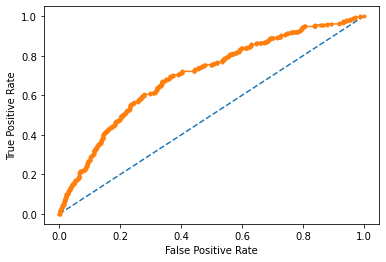

AUC: 0.701


In [116]:
#ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

In [117]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)
auc_score = auc(recall, precision)

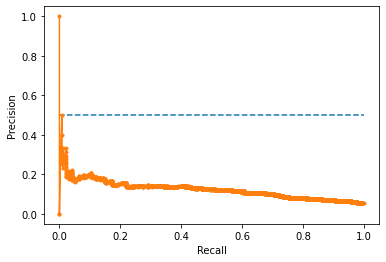

AUC: 0.124


In [118]:
#Precision-Recall Curve Line Plot for Logistic Regression Model for Imbalanced Classification
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

In [119]:
#run test predictions 
predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.95      0.98      0.96      3933
           1       0.18      0.06      0.09       233

    accuracy                           0.93      4166
   macro avg       0.56      0.52      0.53      4166
weighted avg       0.90      0.93      0.92      4166



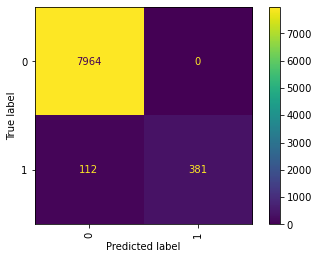

In [120]:
# Plot a confusion matrix for your Tanzania Waterpumps model.
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe, X_train, y_train, values_format='.0f', xticks_rotation='vertical')

In [121]:
#MORE FEATURE ENGINNERING 

In [122]:
#look into creating an optimal threshold and create a few graphs like confusion matrix, roc-auc curve 
#still need to do nlp 


In [123]:
document_lengths = np.array(list(map(len, data['Organization Description'].str.split(' '))))

print("The average number of words in a description is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a description is: {}.".format(min(document_lengths)))
print("The maximum number of words in a description is: {}.".format(max(document_lengths)))

The average number of words in a description is: 13.168660381842669.
The minimum number of words in a description is: 1.
The maximum number of words in a description is: 28.


In [124]:
pd.set_option('display.max_colwidth', -1)

In [125]:
query = data.loc[data['Raised Series A'] == 0, 'Organization Description']
query.sample(5)

10014    SaaS for curating the products and people of event professionals.                                                            
22833    Zemcar is an application that book one-time or recurring scheduled rides.                                                    
7263     BonTerra is a Canadian gold exploration company  with a large balanced portfolio of exploration and mining assets.           
25148    AdStash is a digital signage platform that utilizes programmatic advertising to generate a new revenue stream for businesses.
6748     International student recruitment, conversion and compliance automation software                                             
Name: Organization Description, dtype: category
Categories (12621, object): [A developing a comprehensive verification framework for Intelligent Autonomous Systems ., A fashion enterprise that provides a launchpad to fashion talent and brands using a tech enabled platform, A precise and portable in-vitro device that brings 

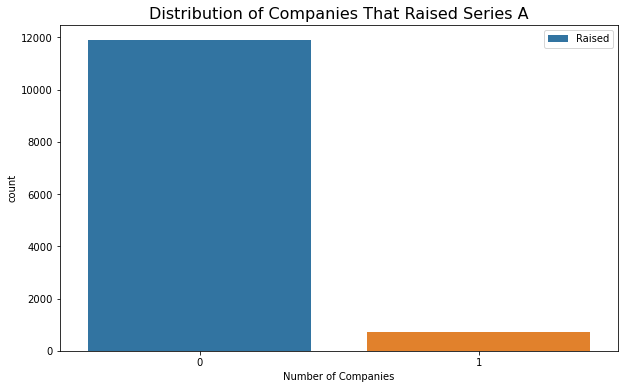

In [126]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x='Raised Series A', data=data,ax=ax, label='Raised')
ax.set_title("Distribution of Companies That Raised Series A", fontsize=16)
ax.set_xlabel("Number of Companies")
plt.legend()
plt.show()

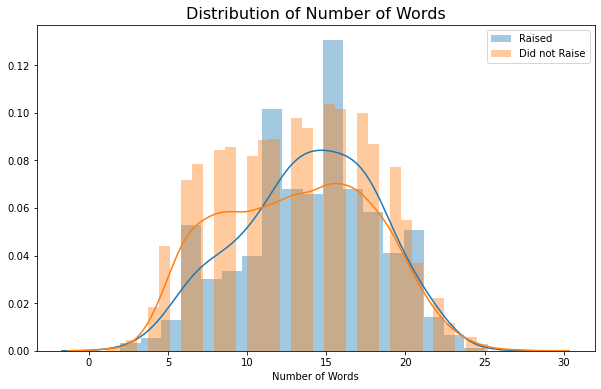

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[data['Raised Series A'] == 1], ax=ax, label='Raised')
sns.distplot(document_lengths[data['Raised Series A'] == 0], ax=ax, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

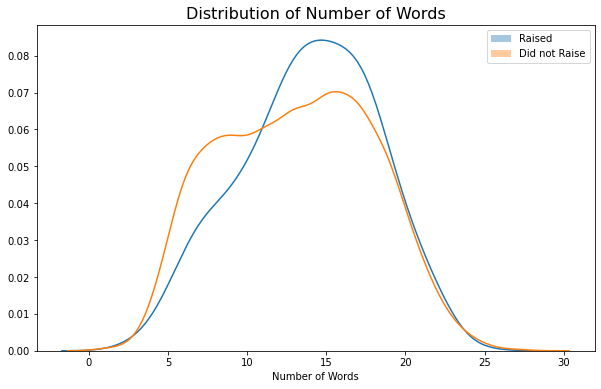

In [128]:
LogMin, LogMax = np.log10(data['Raised Series A'].min()),np.log10(data['Raised Series A'].max())
newBins = np.logspace(LogMin, LogMax,8)


fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[data['Raised Series A'] == 1], ax=ax,bins=newBins,label='Raised')
sns.distplot(document_lengths[data['Raised Series A'] == 0], ax=ax,bins=newBins, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

In [129]:
# Function to preprocess raw test from job description
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

# Remove extra white space
data['Organization Description'] = data['Organization Description'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
data['Organization Description'] = data['Organization Description'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
data['Organization Description'] = data['Organization Description'].str.lower()

# Lemmatize
data['Organization Description'] = data['Organization Description'].map(lambda x: lemmatize(x))

In [130]:
#build a document term matrix for use in building our LDA topic model 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is','and','to','the','for','that','of','in','an','with','is an','on','by','their','your'])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(data['Organization Description'])
dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf.shape))

Document Term Matrix Shape: (12623, 14579)


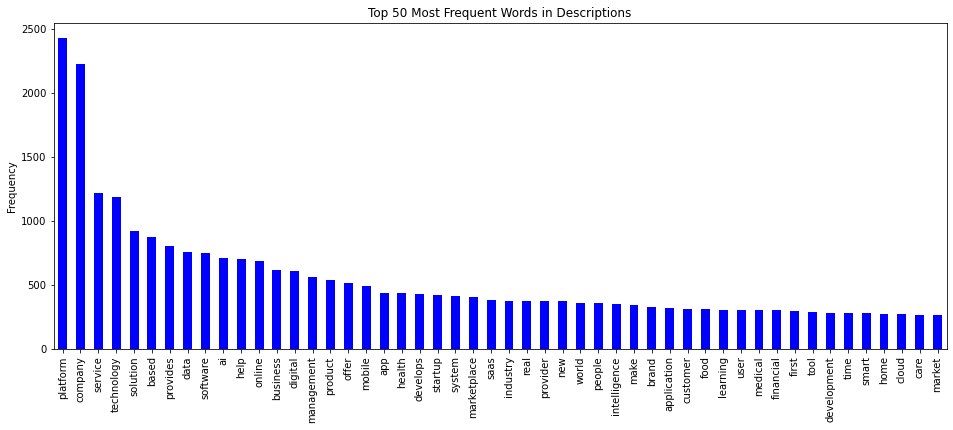

In [131]:
plt.figure(figsize=(16,6))
term_df = pd.DataFrame(dtm_tf.toarray(), columns=dtm_feature_names)
term_df.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(color='blue')
plt.title("Top 50 Most Frequent Words in Descriptions")
plt.ylabel("Frequency")
plt.show()

In [132]:
#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(random_state=10)

In [133]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [134]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.025396 -0.140982  1       1        13.887478
7     -0.121966 -0.143456  2       1        11.164963
4     -0.074830  0.031323  3       1        11.130023
9     -0.051898  0.005779  4       1        10.042253
0      0.174643  0.022644  5       1        9.782093 
1      0.148898  0.043079  6       1        9.658377 
5      0.024095 -0.013572  7       1        9.267483 
3     -0.027982 -0.020652  8       1        9.176674 
2     -0.162291  0.158281  9       1        8.576756 
8      0.065935  0.057557  10      1        7.313899 , topic_info=             Term         Freq        Total Category  logprob  loglift
2500   company     2018.000000  2018.000000  Default  30.0000  30.0000
8421   mobile      442.000000   442.000000   Default  29.0000  29.0000
7463   learning    280.000000   280.000000   Default  28.0000  28.0000
6043   health      397.000000   397.000000   Default  27.0000  27.0000
286    ai          647.000000   647.000000   Default  26.0000  26.0000
...    ..                 ...          ...       ...      ...      ...
7906   management  35.810288    510.639105   Topic10 -5.6693  -0.0420 
3859   device      30.449936    214.652418   Topic10 -5.8315   0.6625 
12327  solution    34.267690    836.654883   Topic10 -5.7133  -0.5798 
1033   based       32.405334    797.974533   Topic10 -5.7692  -0.5884 
6160   help        30.424977    642.631322   Topic10 -5.8323  -0.4349 

[715 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
27     1      0.138748  access       
27     3      0.073025  access       
27     4      0.058420  access       
27     5      0.051118  access       
27     6      0.080328  access       
...   ..           ...     ...       
14504  6      0.163687  world        
14504  7      0.033344  world        
14504  8      0.118219  world        
14504  10     0.015156  world        
14520  5      0.928220  world largest

[1857 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 5, 10, 1, 2, 6, 4, 3, 9])

In [135]:

# xgbclassifer + topic modeling 
# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)
topic_df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)
# Join topic dataframe with numerical features from Method #1
df2 = pd.concat([data, topic_df], axis=1)
print(f'Original Dataframe Shape: {data.shape}')
print(f'New Dataframe Shape: {df2.shape}\n')
df2.head()

Original Dataframe Shape: (12623, 24)
New Dataframe Shape: (12623, 34)



,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,Xperiti,1200000.0,xperiti is an ai powered enterprise software designed to give investment management firm a strategic advantage in research,"New York, New York, United States, North America",0,Artificial Intelligence,Consulting,Content,Information Services,Information Technology,...,0.005556,0.005556,0.005557,0.005557,0.005556,0.005558,0.486122,0.005557,0.005556,0.469424
1,New Age Meats,2740000.0,new age meat focus on rapid development of healthy culitvated meat grown from animal cell instead of animal slaughter,"Berkeley, California, United States, North America",0,Biotechnology,Food and Beverage,Not Listed,Not Listed,Not Listed,...,0.006251,0.006251,0.006252,0.006252,0.006252,0.006251,0.006251,0.006252,0.663315,0.286673
2,Clever Care Health Plan,6000000.0,clever care health plan is a healthcare company that offer medicare advantage health plan to it member,"Westminster, California, United States, North America",1,Health Care,Health Insurance,Insurance,Not Listed,Not Listed,...,0.005264,0.005264,0.005264,0.005264,0.952624,0.005264,0.005263,0.005264,0.005265,0.005265
3,Mahmee,3000000.0,mahmee provides comprehensive personalized support and care management pregnancy through infancy,"Los Angeles, California, United States, North America",0,Health Care,mHealth,Women's,Not Listed,Not Listed,...,0.009091,0.009091,0.009093,0.918169,0.009096,0.009091,0.009092,0.009092,0.009092,0.009092
4,The Org,2500000.0,the org is a community to explore organization chart for public and private company,"New York, New York, United States, North America",1,Communities,Information Technology,Internet,Not Listed,Not Listed,...,0.219624,0.009092,0.009093,0.707633,0.009093,0.009093,0.009093,0.009093,0.009092,0.009093


In [136]:
#make train test split 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

# Split dataframe into features and labels
features = df2.loc[:, df2.columns != 'Raised Series A']
labels = df2['Raised Series A']

# Split data using 80% to train model and 20% to validate performance
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Confirm Shape of Train/Test data
print('Shape of Train Features: {}'.format(X_train2.shape))
print('Shape of Train Labels:   {}'.format(y_train2.shape))
print('Shape of Test Features:  {}'.format(X_test2.shape))
print('Shape of Test Labels:    {}'.format(y_test2.shape))

Shape of Train Features: (10098, 33)
Shape of Train Labels:   (10098,)
Shape of Test Features:  (2525, 33)
Shape of Test Labels:    (2525,)


In [137]:
#run xgboost with cv 
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, clone

pipeline2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier()
)

params = {
        #'simpleimputer__strategy': ['mean', 'median'],
        #'min_child_weight': [1, 5, 10],
        #'gamma': [0.5, 1, 1.5, 2, 5],
        #'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        #'max_depth': [3, 4, 5]
        }
search = RandomizedSearchCV( pipeline2, param_distributions = params, n_iter = 5, cv = 5, scoring = 'recall', verbose = 10, return_train_score = True, n_jobs = -1)


search.fit(X_train2, y_train2);
#estimators.get_paramas_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.4s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    8.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished


In [138]:
# xgbclassifer + topic modeling 
print('Best Hyperparameters', search.best_params_)
print('Recall', search.best_score_)

Best Hyperparameters {}
Recall 0.01049580472921434


In [139]:
# xgbclassifer + topic modeling 
probs2 = search.predict_proba(X_test2)[:, -1]


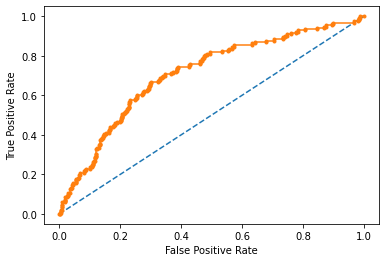

AUC: 0.701


In [140]:
#ROC Curve for xgbclassifer + topic modeling 
fpr, tpr, thresholds = roc_curve(y_test2, probs2)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

In [141]:
# xgbclassifer + topic modeling 
precision, recall, thresholds = precision_recall_curve(y_test2, probs2)
auc_score2 = auc(recall, precision)

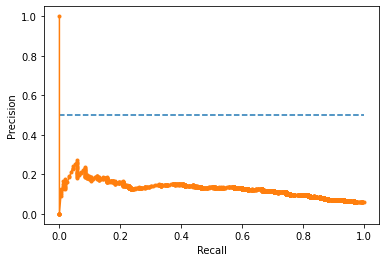

AUC: 0.701


In [142]:
#Precision-Recall Curve for xgbclassifer + topic modeling 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

In [143]:
#run test predictions 
predictions2 = search.predict(X_test2)
print(classification_report(y_test2, predictions2))

precision    recall  f1-score   support

           0       0.94      1.00      0.97      2372
           1       0.11      0.01      0.01       153

    accuracy                           0.94      2525
   macro avg       0.53      0.50      0.49      2525
weighted avg       0.89      0.94      0.91      2525



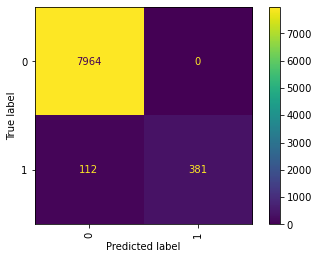

In [144]:
# xgbclassifer + topic modeling 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe, X_train, y_train, values_format='.0f', xticks_rotation='vertical')

In [145]:
# i need to write a linear regression model log 1
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

features2 = df2.loc[:, df2.columns != 'Raised Series A']
labels2 = df2['Raised Series A']


X_train3, X_test3, y_train3, y_test3 = train_test_split(features2, labels2, test_size = 0.2, random_state = 42)



In [146]:
#log 1 
pipeline3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    LogisticRegression()
)




pipe3 = pipeline3.fit(X_train3, y_train3);

In [162]:
# log 1 
log_train = pipe3.predict(X_train3)
print("Log reg train Recall Accuracy:", recall_score(y_train3, log_train))
print("Log reg train Accuracy Score:", accuracy_score(y_train3, log_train))
print("Log reg train Precision Accuracy:", precision_score(y_train3, log_train))

Log reg train Recall Accuracy: 0.0
Log reg train Accuracy Score: 0.9432560903149139
Log reg train Precision Accuracy: 0.0


In [148]:
#run test predictions for log 1 
predictions3 = pipe3.predict(X_test3)
print(classification_report(y_test3, predictions3))

precision    recall  f1-score   support

           0       0.94      0.98      0.96      2372
           1       0.12      0.03      0.05       153

    accuracy                           0.93      2525
   macro avg       0.53      0.51      0.51      2525
weighted avg       0.89      0.93      0.91      2525



In [149]:
#log 1 
probs0 = pipe3.predict_proba(X_test3)
probs0 = probs0[:, 1]

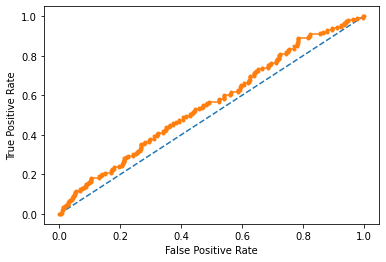

AUC: 0.558


In [150]:
#ROC Curve for log 1 
fpr, tpr, thresholds = roc_curve(y_test3, probs0)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test3, probs0)
print('AUC: %.3f' % auc_score)

In [151]:
#log 1 
precision, recall, thresholds = precision_recall_curve(y_test3, probs0)
auc_score2 = auc(recall, precision)

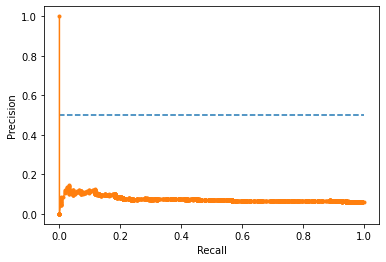

AUC: 0.558


In [152]:
#Precision-Recall Curve Line Plot for Log Model 1 for Imbalanced Classification 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

In [153]:
#logistic regression ran better. things i could maybe spend some time on tomorrow before starting haroku:
# get feature importance 
# run smote ?
# tweak topic modeling to make it perform better? 



In [154]:
# run logistic regression without the topic modeling 
features3 = data.loc[:, data.columns != 'Raised Series A']
labels3 = data['Raised Series A']


X_train4, X_test4, y_train4, y_test4 = train_test_split(features3, labels3, test_size = 0.2, random_state = 42)

In [155]:
#pipeline for log regression without topic modeling 
pipeline4 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    LogisticRegression()
)




pipe4 = pipeline4.fit(X_train4, y_train4);

In [163]:
#scores fore second log func
log_train2 = pipe4.predict(X_train4)
print("Log2 reg train Recall Accuracy:", recall_score(y_train4, log_train2))
print("Log2 reg train Accuracy Score:", accuracy_score(y_train4, log_train2))
print("Log2 reg train Precision Accuracy:", precision_score(y_train4, log_train2))

Log2 reg train Recall Accuracy: 0.0
Log2 reg train Accuracy Score: 0.9432560903149139
Log2 reg train Precision Accuracy: 0.0


In [157]:
#run test predictions 
predictions4 = pipe4.predict(X_test4)
print(classification_report(y_test4, predictions4))

precision    recall  f1-score   support

           0       0.94      0.99      0.96      2372
           1       0.14      0.03      0.05       153

    accuracy                           0.93      2525
   macro avg       0.54      0.51      0.51      2525
weighted avg       0.89      0.93      0.91      2525



In [158]:
probs3 = pipe4.predict_proba(X_test4)
probs3 = probs3[:, 1]

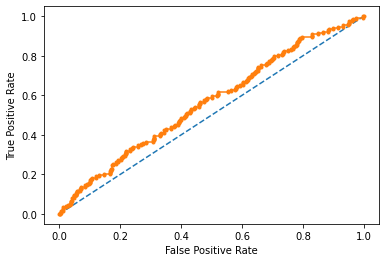

AUC: 0.565


In [159]:
#ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test4, probs3)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test4, probs3)
print('AUC: %.3f' % auc_score)

In [160]:
#log regression without topic modeling
precision, recall, thresholds = precision_recall_curve(y_test3, probs0)
auc_score2 = auc(recall, precision)

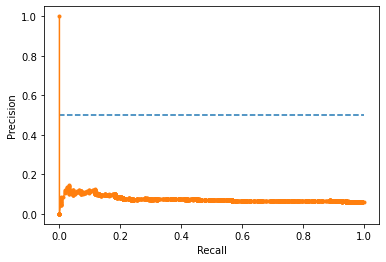

AUC: 0.565


In [161]:
#Precision-Recall Curve Line Plot for Log Model 1 for Imbalanced Classification 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)